# Monte Carlo Integration

This notebook demonstrates using Monte Carlo methods to calculate $\pi$ and evaluate integrals numerically.

## Author
James Bott

## Calculating $\pi$

As an example of using a Monte-Carlo numerical method the following code calculates the value of $\pi$.


After 1000 trials, 814 samples fall within the circle.
The estimated value of Pi is: 3.256


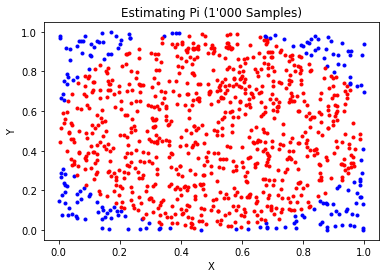

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Create 1000 samples drawn from a uniform distribution 
df = pd.DataFrame(columns = ("X","Y"), data = np.random.uniform((0,0),(1,1),(1000,2)))
df['Inside'] = df.apply(lambda row: ((row["X"] - 0.5)**2 + (row["Y"] - 0.5)**2) <= 0.5**2, axis=1)

piCalculated = (df['Inside'].sum() / df.shape[0]) / (0.5**2)

# Summarise results 
print(f"After {df.shape[0]} trials, {df['Inside'].sum()} samples fall within the circle.")
print(f"The estimated value of Pi is: {piCalculated}")

# Create a plot
plt.scatter(df[df["Inside"] == False]["X"], df[df["Inside"] == False]["Y"], color="b", marker=".")
plt.scatter(df[df["Inside"] == True]["X"], df[df["Inside"] == True]["Y"], color="r", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Estimating Pi (1'000 Samples)")
plt.show()


Extending to 100`000 points:

After 100000 trials, 78505 samples fall within the circle.
The estimated value of Pi is: 3.1402


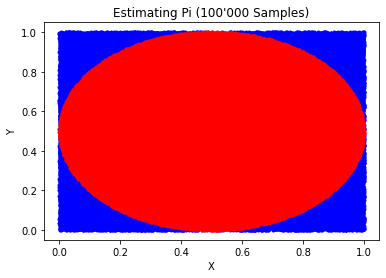

In [2]:
# Create 100`000 samples drawn from a uniform distribution 
df = pd.DataFrame(columns = ("X","Y"), data = np.random.uniform((0,0),(1,1),(100000,2)))
df['Inside'] = df.apply(lambda row: ((row["X"] - 0.5)**2 + (row["Y"] - 0.5)**2) <= 0.5**2, axis=1)

piCalculated = (df['Inside'].sum() / df.shape[0]) / (0.5**2)

# Summarise results 
print(f"After {df.shape[0]} trials, {df['Inside'].sum()} samples fall within the circle.")
print(f"The estimated value of Pi is: {piCalculated}")

# Create a plot
plt.scatter(df[df["Inside"] == False]["X"], df[df["Inside"] == False]["Y"], color="b", marker=".")
plt.scatter(df[df["Inside"] == True]["X"], df[df["Inside"] == True]["Y"], color="r", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Estimating Pi (100'000 Samples)")
plt.show()


We can further extend to 100'000'000 samples using vectroized operations in Pandas:

In [3]:
# Create 100`000`000 samples drawn from a uniform distribution 
df = pd.DataFrame(columns = ("X","Y"), data = np.random.uniform((0,0),(1,1),(100000000,2)))

# Using vector operations to improve performance
df['Inside'] = (df['X'] * df['X'] - 2*0.5*df['X'] + 0.5*0.5 + df['Y'] * df['Y'] - 2*0.5*df['Y'] + 0.5**2) <= 0.5**2

piCalculated = (df['Inside'].sum() / df.shape[0]) / (0.5**2)

# Summarise results 
print(f"After {df.shape[0]} trials, {df['Inside'].sum()} samples fall within the circle.")
print(f"The estimated value of Pi is: {piCalculated}")


After 100000000 trials, 78540683 samples fall within the circle.
The estimated value of Pi is: 3.14162732


## Calculating the Integral of $x^2$

This first example calculates the definite integral of $x^2$ in the range [0, 100]. It is trivial to find the integral of $x^2$ analytically and this allows us to easily verify the result of the Monte-Carlo numerical method. 



The analytical value of the integral: 333333.3333333333

Samples   Monte Carlo Integral
------------------------------------------------------------
10000     332214.87789590546
20000     330764.43293642055
30000     333120.47193537175
40000     334618.58109018375
50000     334621.12191407784
60000     334229.0794955637
70000     334655.63417002297
80000     333900.6464541101
90000     333124.80861618073
100000     332706.29230369505
110000     332285.8933317227
120000     332098.29267228936
130000     332310.3235980338
140000     332053.73748829326
150000     332056.01584650023
160000     331801.24622545345
170000     331848.561148473
180000     331792.71092605294
190000     331713.5646234845
200000     331758.9840223311
210000     331832.6477086939
220000     331687.94154420163
230000     331564.9939861724
240000     331658.0260135102
250000     331828.5127953104
260000     331913.245640605
270000     331833.142323822
280000     331890.4759392817
290000     331846.54742079595
300000 

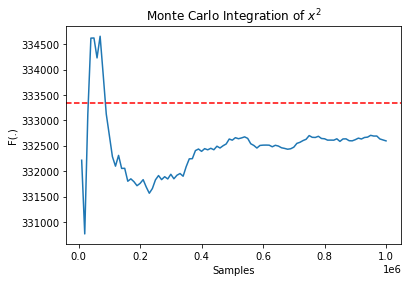

In [4]:
# Domain over which to evaluate integral
domain = (0, 100)

# Function to integrate
def f(row):
    return row["X"]**2

# Definite integral of the function for comparison
def F(domain):
    return (domain[1]**3)/3 - (domain[0]**3)/3

# Define an empty data frame
df = pd.DataFrame(columns = ("X", "Y"))

# Empty list for errors
iterations = []
errors = []

print(f"The analytical value of the integral: {F(domain)}\n")
print("Samples" + " " * 3 + "Monte Carlo Integral")
print("-" * 60)
for i in range(0,100):

    # Create 10'000 samples drawn from a uniform distribution 
    dfNew = pd.DataFrame(columns = ("X",), data = np.random.uniform(domain[0], domain[1], 10000))
    dfNew['Y'] = dfNew.apply(f, axis=1)
    df = pd.concat([df, dfNew], axis=0)

    # Find the mean value of the function
    meanValue = df['Y'].sum() / df.shape[0]

    # Find the integral calculated over the domain
    calculatedIntegral = meanValue * (domain[1] - domain[0])

    errors.append(calculatedIntegral)
    iterations.append((i+1)*10000)
    
    # Display results
    print(f"{(i+1)*10000}     {calculatedIntegral}")
    
plt.plot(iterations,errors)
plt.axhline(F(domain), color="r", linestyle="--")
plt.xlabel("Samples")
plt.ylabel("F(.)")
plt.title("Monte Carlo Integration of $x^2$")
plt.show()

## Calculating the Integral of $\mathrm{e}^{-\sin(x^2)}$

We can calculate a more complex integral using the same Monte-Carlo method.

Samples   Monte Carlo Integral
------------------------------------------------------------
50000     0.7241795450929752
100000     0.7248094018933092
150000     0.7252765509171812
200000     0.725763167106689
250000     0.7258532165610089
300000     0.7265903045369654
350000     0.726446882410484
400000     0.7260258104480122
450000     0.7258367545517647
500000     0.7259980802614612
550000     0.7258875455254554
600000     0.7261930571280238
650000     0.7260373820274787
700000     0.7260651897977622
750000     0.7262142687170353
800000     0.726220897334452
850000     0.7261174406509763
900000     0.7261295542708108
950000     0.7261080706606935
1000000     0.7259442972240083
1050000     0.7258179262321514
1100000     0.7257976080117355
1150000     0.7259162819836074
1200000     0.725793942451708
1250000     0.7256565049680092
1300000     0.7255045076377233
1350000     0.7254994190557739
1400000     0.7254252690074982
1450000     0.7253818378459802
1500000     0.7253356758611046
15

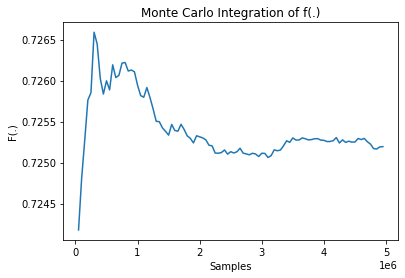

In [5]:
# Domain over which to evaluate integral
domain = (1, 2)

# Function to integrate
def f(x):
    return np.exp(-np.sin(x**2))

# Create n samples drawn from a uniform distribution 
n = 5000000
df = pd.DataFrame(columns = ("X",), data = np.random.uniform(domain[0], domain[1], n))
# User numpy vectorize rather than pandas apply to increase speed 
df['Y'] = np.vectorize(f)(df["X"])

# Empty list for errors
iterations = []
errors = []

print("Samples" + " " * 3 + "Monte Carlo Integral")
print("-" * 60)
step = 50000
for i in range(step, n, step):

    # Find the mean value of the function
    meanValue = df[0:i]['Y'].sum() / i

    # Find the integral calculated over the domain
    calculatedIntegral = meanValue * (domain[1] - domain[0])

    errors.append(calculatedIntegral)
    iterations.append(i)
    
    # Display results
    print(f"{i}     {calculatedIntegral}")
    
plt.plot(iterations,errors)
plt.xlabel("Samples")
plt.ylabel("F(.)")
plt.title("Monte Carlo Integration of f(.)")
plt.show()